# **Importando bibliotecas necessárias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

# **Leitura da Base de Dados**

In [2]:
df = pd.read_csv('Corpus_processado3.csv',delimiter=';',encoding='latin-1')
df.head()

,abstract,classe
0,antitumorpromot principl angelica keiskei pote...,positive
1,effect catechin mous lung carcinoma cell adhes...,positive
2,cyclooxygenas inhibitor potenti properti colon...,positive
3,phase novel sulfonamid discov slowgrow colon c...,positive
4,retinoid iv design synthesi structureact ditbu...,positive


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Número de resumos Positivos e Negativos')

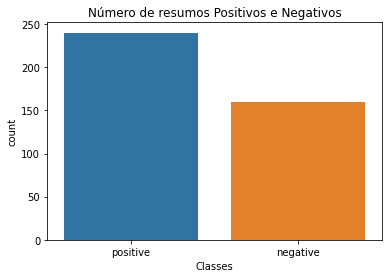

In [3]:
sns.countplot(df.classe)
plt.xlabel('Classes')
plt.title('Número de resumos Positivos e Negativos')

# **Divisão de treino e teste em 15%**

In [4]:
X = df.abstract
Y = df.classe
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [6]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

# **Criando o modele de Rede Neural LSTM**

In [7]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

# **Compilando o modelo**

In [8]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [9]:
history = model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
3/3 [==============================] - 4s 443ms/step - loss: 0.6914 - accuracy: 0.5368 - val_loss: 0.6809 - val_accuracy: 0.5441
Epoch 2/10
3/3 [==============================] - 1s 164ms/step - loss: 0.6490 - accuracy: 0.6103 - val_loss: 0.6132 - val_accuracy: 0.5588


In [10]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [11]:
accr = model.evaluate(test_sequences_matrix,Y_test)

2/2 [==============================] - 0s 25ms/step - loss: 0.5922 - accuracy: 0.6167


# **Acurácia**

In [12]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.592
  Accuracy: 0.617


# **Plotando a Curva ROC**

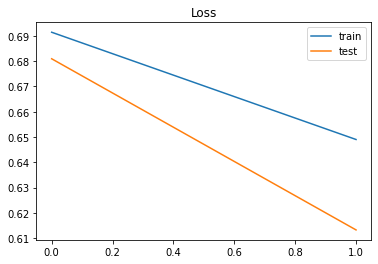

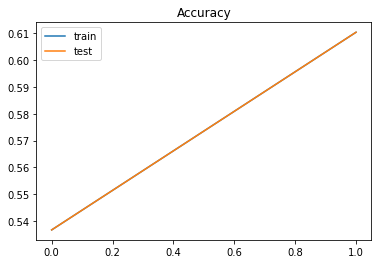

In [15]:
plt.title('Loss')
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

plt.title('Accuracy')
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['accuracy'], label = 'test')
plt.legend()
plt.show()

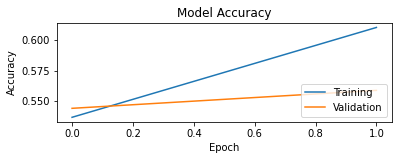

In [14]:
model.compile(loss="categorical_crossentropy",
              optimizer='adam', metrics=["accuracy"])

 
plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')